# Исследование генераторов случайных чисел

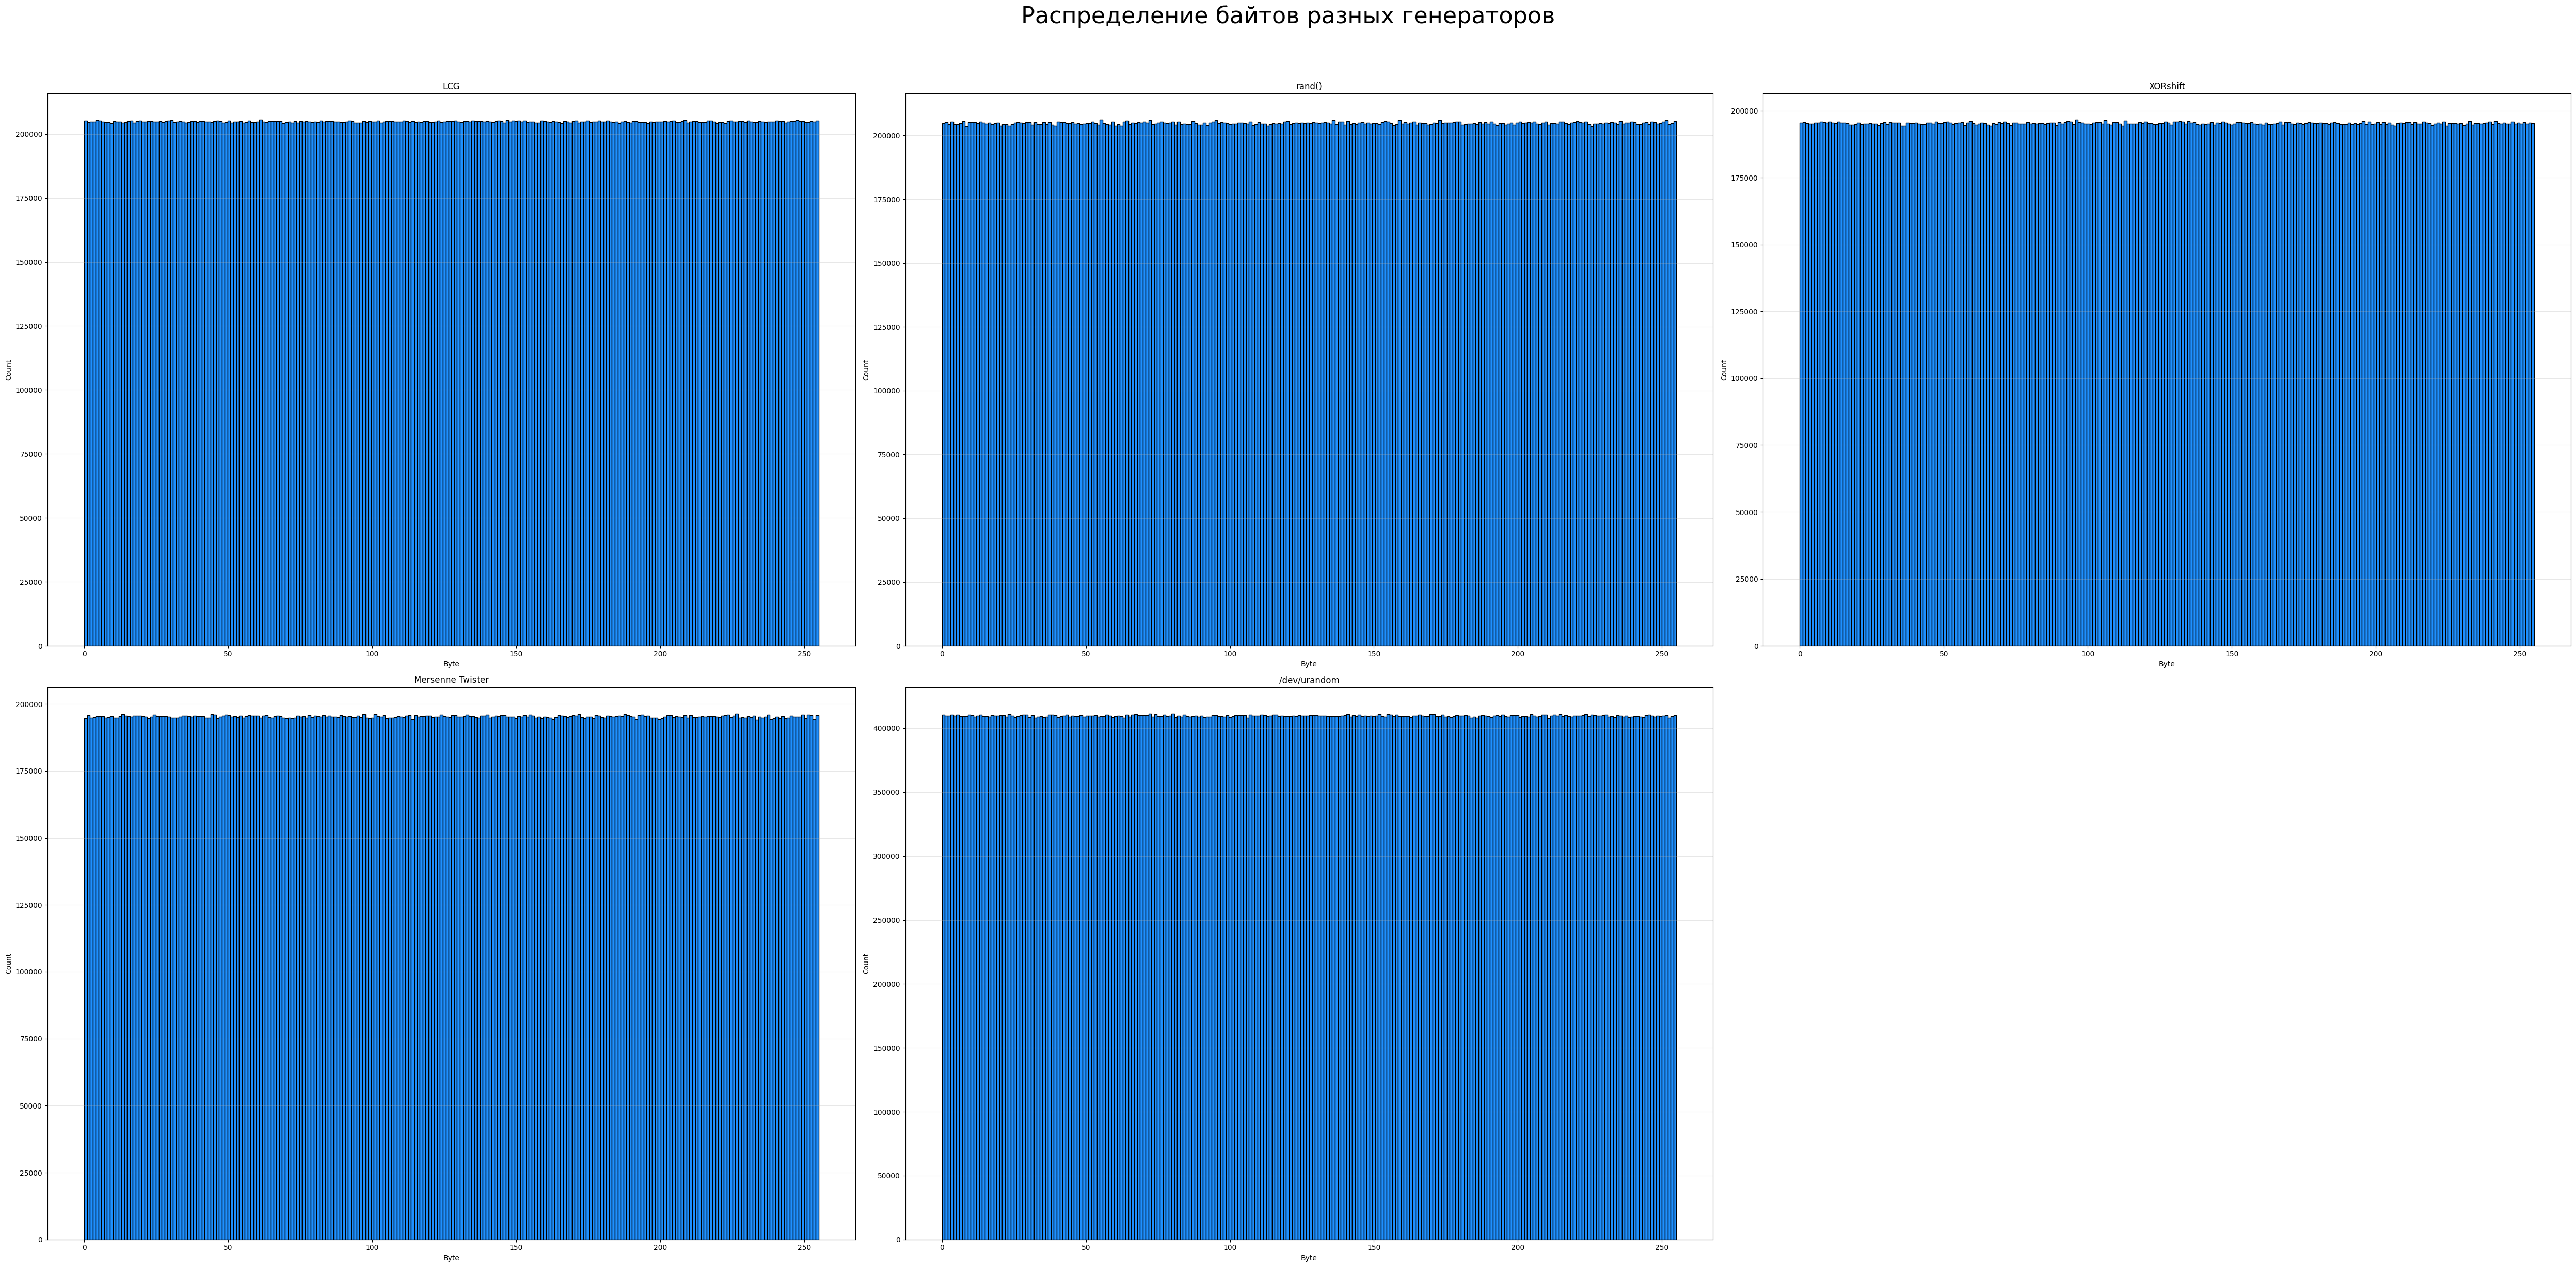

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Пути к файлам
file_paths = [
    "lcg.bin",
    "rand.bin",
    "xorshift.bin",
    "mt.bin",
    "urandom_100mb.bin"
]

# Названия
titles = [
    "LCG",
    "rand()",
    "XORshift",
    "Mersenne Twister",
    "/dev/urandom"
]

# 2 строки, 3 столбца (последнее поле останется пустым)
fig, axes = plt.subplots(2, 3, figsize=(50, 25))
axes = axes.flatten()

for i, (ax, file_path, title) in enumerate(zip(axes, file_paths + [""], titles + [""])):
    if file_path:
        with open(file_path, "rb") as f:
            data = f.read()
        byte_values = np.frombuffer(data, dtype=np.uint8)
        ax.hist(byte_values, bins=256, range=(0, 255), color='dodgerblue', edgecolor='black')
        ax.set_title(title)
        ax.set_xlabel("Byte")
        ax.set_ylabel("Count")
        ax.grid(True, axis='y', alpha=0.3)
    else:
        ax.axis("off")  # если лишнее окно — отключаем его

plt.suptitle("Распределение байтов разных генераторов", fontsize=32)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Прочитано 10000 байтов.


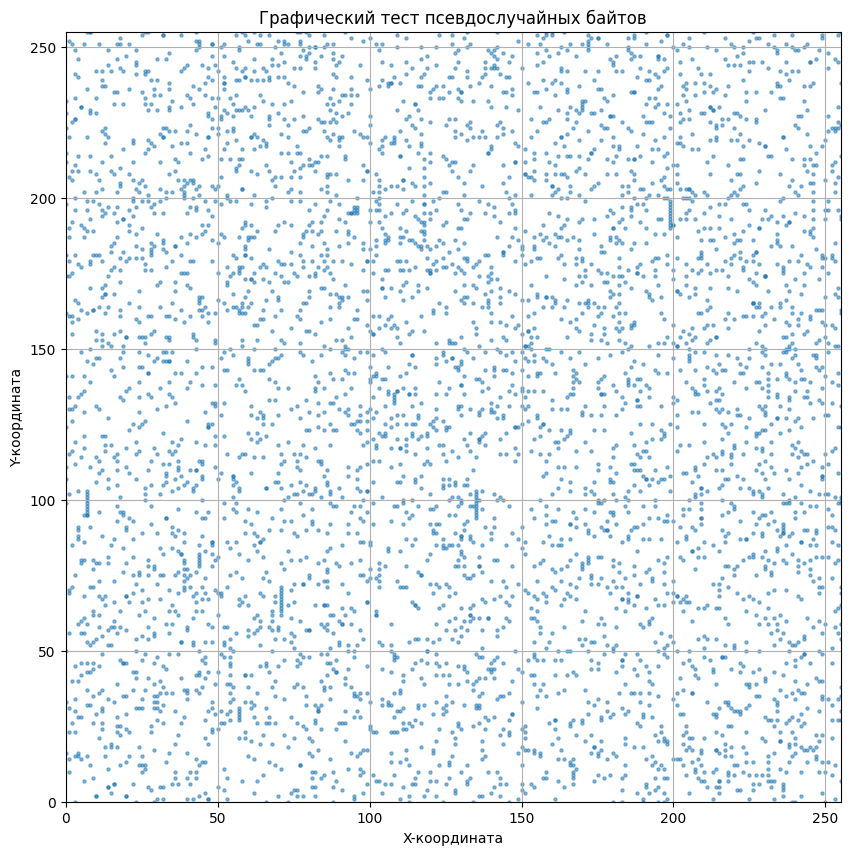

Прочитано 10000 байтов.


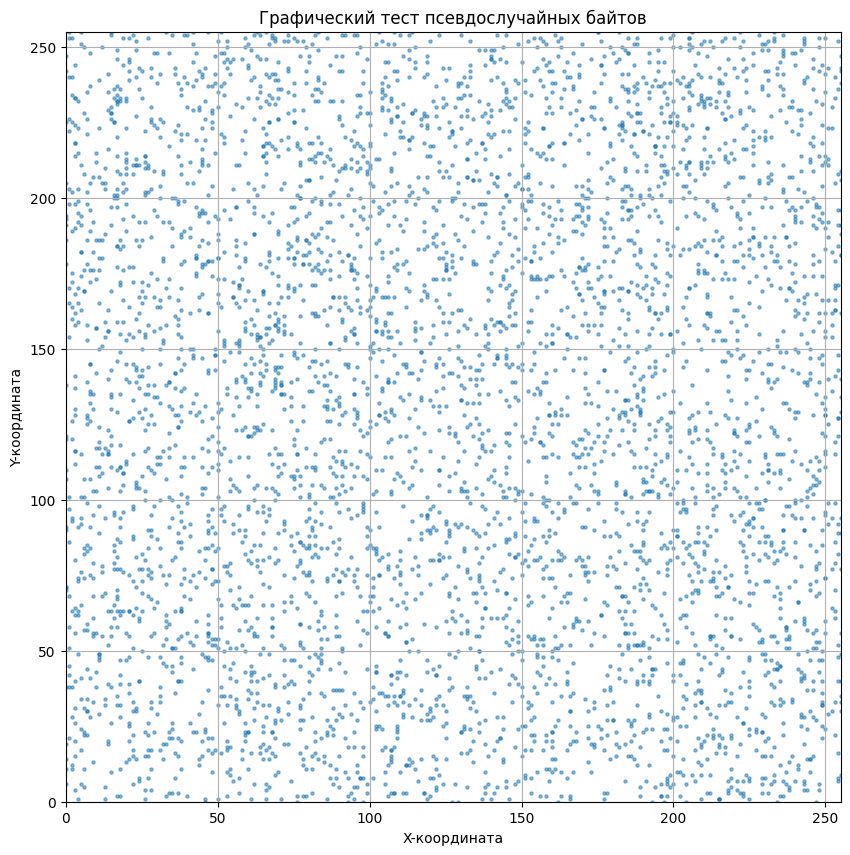

Прочитано 10000 байтов.


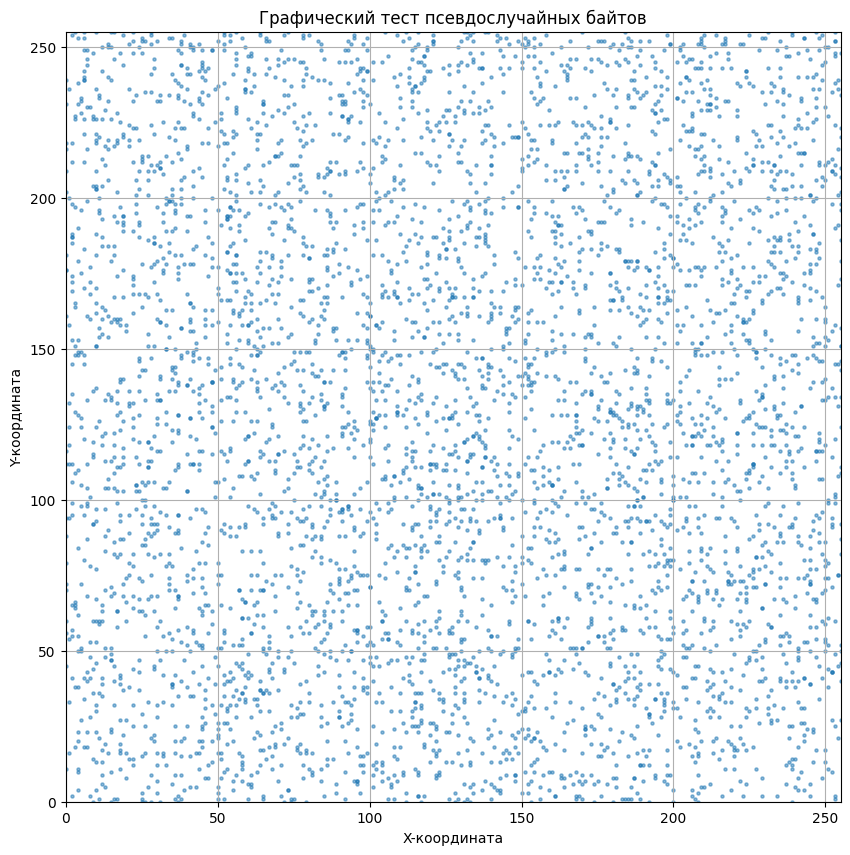

Прочитано 10000 байтов.


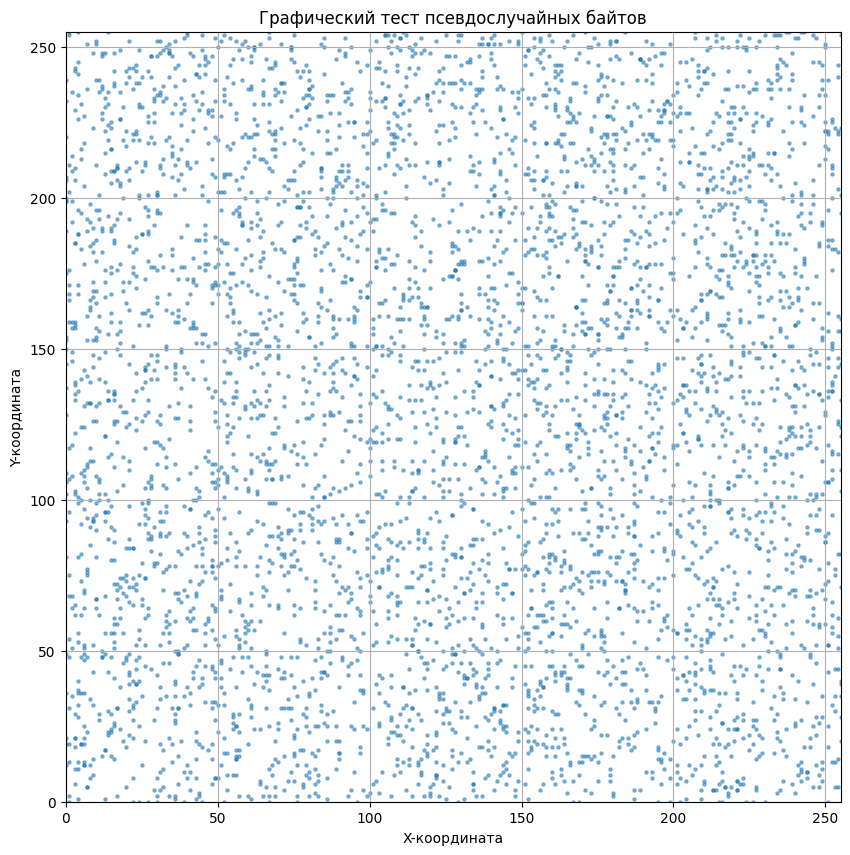

Прочитано 10000 байтов.


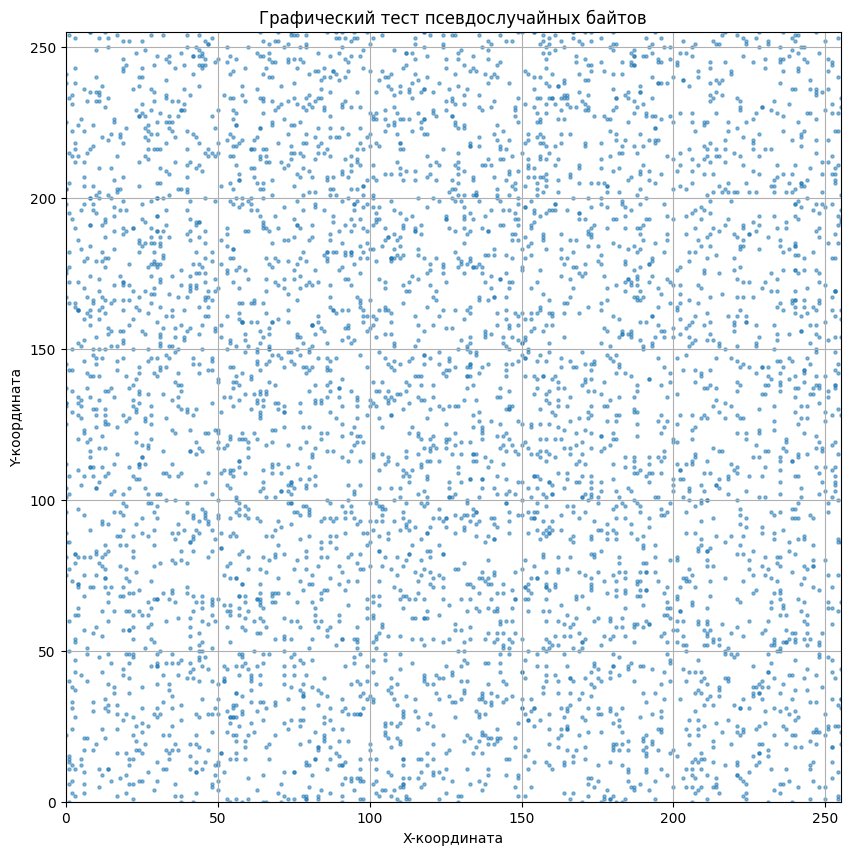

In [3]:
def read_bytes_from_file(filename, max_bytes=10000):
    """Чтение байтов из файла."""
    with open(filename, 'rb') as file:
        data = file.read(max_bytes)
    return data

def plot_bytes_as_points(bytes_data):
    """Визуализация байтов как точек на плоскости.

    Параметры:
    - mode='pairs': пары байтов (x, y)
    - mode='nibbles': каждый байт разбивается на два полубайта (4 бита)
    """
    xs, ys = [], []
    # Пары байтов: (байт 1, байт 2), (байт 3, байт 4), ...
    for i in range(0, len(bytes_data) - 1, 2):
      xs.append(bytes_data[i])
      ys.append(bytes_data[i + 1])


    plt.figure(figsize=(10, 10))
    plt.scatter(xs, ys, alpha=0.5, s=5)
    plt.title("Графический тест псевдослучайных байтов")
    plt.xlabel("X-координата")
    plt.ylabel("Y-координата")

    plt.xlim(0, 255)
    plt.ylim(0, 255)

    plt.grid(True)
    plt.show()

def main():

    filename = 'lcg.bin'
    bytes_data = read_bytes_from_file(filename)
    if not bytes_data:
        print("Файл пуст или не содержит данных.")
        return

    print(f"Прочитано {len(bytes_data)} байтов.")

    plot_bytes_as_points(bytes_data)

    filename = 'rand.bin'
    bytes_data = read_bytes_from_file(filename)
    if not bytes_data:
        print("Файл пуст или не содержит данных.")
        return

    print(f"Прочитано {len(bytes_data)} байтов.")

    plot_bytes_as_points(bytes_data)

    filename = 'mt.bin'
    bytes_data = read_bytes_from_file(filename)
    if not bytes_data:
        print("Файл пуст или не содержит данных.")
        return

    print(f"Прочитано {len(bytes_data)} байтов.")

    plot_bytes_as_points(bytes_data)

    filename = 'xorshift.bin'
    bytes_data = read_bytes_from_file(filename)
    if not bytes_data:
        print("Файл пуст или не содержит данных.")
        return

    print(f"Прочитано {len(bytes_data)} байтов.")

    plot_bytes_as_points(bytes_data)

    filename = 'urandom_100mb.bin'
    bytes_data = read_bytes_from_file(filename)
    if not bytes_data:
        print("Файл пуст или не содержит данных.")
        return

    print(f"Прочитано {len(bytes_data)} байтов.")

    plot_bytes_as_points(bytes_data)

if __name__ == "__main__":
    main()

In [4]:
import math
from collections import Counter

def shannon_entropy(data):
    counter = Counter(data)
    total = len(data)
    entropy = 0.0
    for count in counter.values():
        p = count / total
        entropy -= p * math.log2(p)
    return entropy

files = ["lcg.bin", "rand.bin", "mt.bin", "xorshift.bin", "urandom_100mb.bin"]
titles = ["LCG", "rand()", "XORshift", "Mersenne Twister", "/dev/urandom"]


for file, title in zip(files, titles):
  with open(file, "rb") as f:
    data = f.read()
    entropy = shannon_entropy(data)
    print(f"Энтропия {title}: {entropy:.3f} бит/байт (макс = 8.0)")

Энтропия LCG: 8.000 бит/байт (макс = 8.0)
Энтропия rand(): 8.000 бит/байт (макс = 8.0)
Энтропия XORshift: 8.000 бит/байт (макс = 8.0)
Энтропия Mersenne Twister: 8.000 бит/байт (макс = 8.0)
Энтропия /dev/urandom: 8.000 бит/байт (макс = 8.0)


In [5]:
from scipy.stats import chisquare
import numpy as np

files = ["lcg.bin", "rand.bin", "mt.bin", "xorshift.bin", "urandom_100mb.bin"]
titles = ["LCG", "rand()", "XORshift", "Mersenne Twister", "/dev/urandom"]

for file, title in zip(files, titles):
  data = np.fromfile(file, dtype=np.uint8)
  counts = np.bincount(data, minlength=256)
  stat, p = chisquare(counts)
  print(f"Значение хи-квадрат {title}: {stat:.2f}, p-value: {p:.4f}")
  if p < 0.05:
    print("Есть статистически значимое отклонение от равномерного распределения.\n")
  else:
    print("Нет оснований считать, что распределение неравномерно.\n")

Значение хи-квадрат LCG: 86.14, p-value: 1.0000
Нет оснований считать, что распределение неравномерно.

Значение хи-квадрат rand(): 281.37, p-value: 0.1232
Нет оснований считать, что распределение неравномерно.

Значение хи-квадрат XORshift: 233.48, p-value: 0.8292
Нет оснований считать, что распределение неравномерно.

Значение хи-квадрат Mersenne Twister: 207.99, p-value: 0.9859
Нет оснований считать, что распределение неравномерно.

Значение хи-квадрат /dev/urandom: 285.02, p-value: 0.0951
Нет оснований считать, что распределение неравномерно.

